In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("microclimate-sensors-data.csv")

# Count the number of missing values in each column
missing_counts = df.isnull().sum()
print("Missing values per feature:")
print(missing_counts)



Missing values per feature:
Device_id                   0
Time                        0
SensorLocation           6143
LatLong                 11483
MinimumWindDirection    40395
AverageWindDirection      507
MaximumWindDirection    40553
MinimumWindSpeed        40553
AverageWindSpeed          507
GustWindSpeed           40553
AirTemperature            507
RelativeHumidity          507
AtmosphericPressure       507
PM25                    19130
PM10                    19130
Noise                   19130
dtype: int64


In [5]:
import pandas as pd

df = pd.read_csv("microclimate-sensors-data.csv")

for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'O':  # non-numeric column
            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value)
            print(f"Missing values in non-numeric column '{column}' have been filled with mode value '{mode_value}'")
        else:  # numeric column
            median_value = df[column].median()
            df[column] = df[column].fillna(median_value)
            print(f"Missing values in numeric column '{column}' have been filled with median value {median_value}")




Missing values in non-numeric column 'SensorLocation' have been filled with mode value '1 Treasury Place'
Missing values in non-numeric column 'LatLong' have been filled with mode value '-37.8185931, 144.9716404'
Missing values in numeric column 'MinimumWindDirection' have been filled with median value 0.0
Missing values in numeric column 'AverageWindDirection' have been filled with median value 159.0
Missing values in numeric column 'MaximumWindDirection' have been filled with median value 353.0
Missing values in numeric column 'MinimumWindSpeed' have been filled with median value 0.0
Missing values in numeric column 'AverageWindSpeed' have been filled with median value 0.8
Missing values in numeric column 'GustWindSpeed' have been filled with median value 2.8
Missing values in numeric column 'AirTemperature' have been filled with median value 15.7
Missing values in numeric column 'RelativeHumidity' have been filled with median value 68.4
Missing values in numeric column 'AtmosphericP

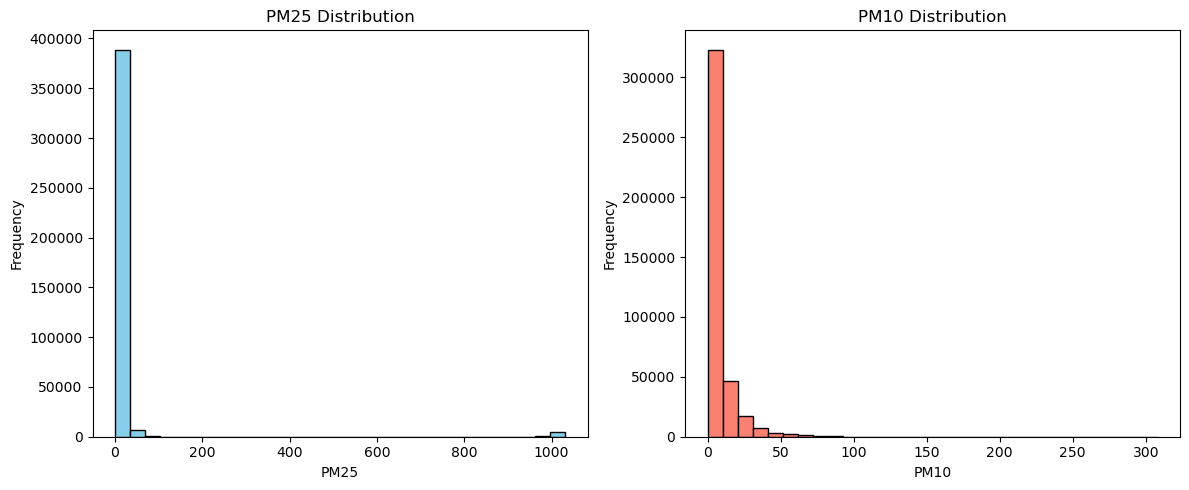

Correlation between PM25 and PM10: 0.05


In [6]:
import matplotlib.pyplot as plt

# Plot histograms
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(df['PM25'], bins=30, color='skyblue', edgecolor='black')
plt.title('PM25 Distribution')
plt.xlabel('PM25')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['PM10'], bins=30, color='salmon', edgecolor='black')
plt.title('PM10 Distribution')
plt.xlabel('PM10')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['PM25'].corr(df['PM10'])
print(f"Correlation between PM25 and PM10: {correlation:.2f}")


In [7]:
import pandas as pd

# Load data (assuming df is already loaded and cleaned)
# df = pd.read_csv("microclimate-sensors-data.csv")

# Split 'LatLong' column into two separate columns: 'Latitude' and 'Longitude'
df[['Latitude', 'Longitude']] = df['LatLong'].str.split(',', expand=True)

# Convert the new columns to float type
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

# Display the first few rows of new columns
print(df[['Latitude', 'Longitude']].head())


    Latitude   Longitude
0 -37.820408  144.959119
1 -37.812888  144.975086
2 -37.818593  144.971640
3 -37.822234  144.982941
4 -37.812888  144.975086


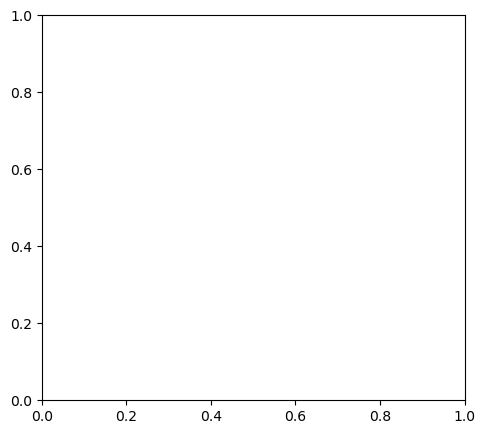

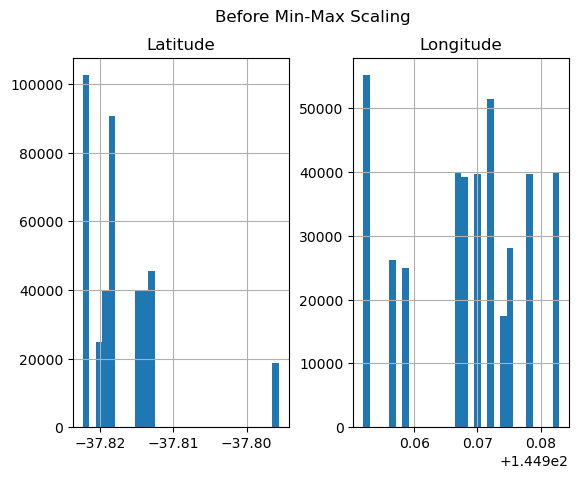

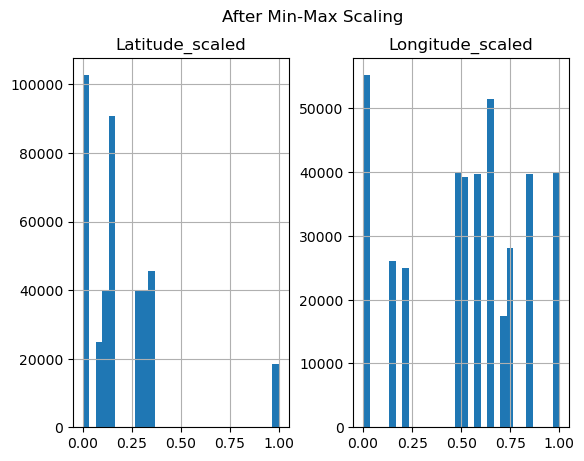

Before scaling, Latitude and Longitude have their original range values.
After Min-Max scaling, the values are transformed to a range between 0 and 1.
This helps many machine learning algorithms work better by normalizing feature scales.


In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you already split 'LatLong' into 'Latitude' and 'Longitude' columns
# For example: df[['Latitude', 'Longitude']] = df['LatLong'].str.split(',', expand=True)

# Convert these columns from string to float
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

# Plot histograms before scaling
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
df[['Latitude', 'Longitude']].hist(bins=30)
plt.suptitle("Before Min-Max Scaling")

# Apply Min-Max scaling
scaler = MinMaxScaler()
df[['Latitude_scaled', 'Longitude_scaled']] = scaler.fit_transform(df[['Latitude', 'Longitude']])

# Plot histograms after scaling
plt.subplot(1, 2, 2)
df[['Latitude_scaled', 'Longitude_scaled']].hist(bins=30)
plt.suptitle("After Min-Max Scaling")

plt.show()

print("Before scaling, Latitude and Longitude have their original range values.")
print("After Min-Max scaling, the values are transformed to a range between 0 and 1.")
print("This helps many machine learning algorithms work better by normalizing feature scales.")
